## Plotting HF for supplemental material

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the data, first column is the date
spring_HF = pd.read_csv('spring_hypflux_2023_mday.csv', parse_dates=[0], index_col=0)
summer_HF = pd.read_csv('summer_hypflux_2023_mday.csv', parse_dates=[0], index_col=0)
spring_HF

,T1,T2,T3,T5,T6,T7,T8
Date_Time,,,,,,,
2023-04-28 00:00:00,0.1093,-0.316557,-0.068030,0.108717,-0.019590,-0.133146,-0.002885
2023-04-28 00:15:00,0.1094,-0.316226,-0.067258,0.108882,-0.019189,-0.132616,-0.002838
2023-04-28 00:30:00,0.1094,-0.315929,-0.066535,0.109012,-0.018805,-0.132122,-0.002793
2023-04-28 00:45:00,0.1095,-0.315670,-0.065864,0.109103,-0.018439,-0.131655,-0.002750
2023-04-28 01:00:00,0.1095,-0.315446,-0.065252,0.109159,-0.018109,-0.131220,-0.002710
...,...,...,...,...,...,...,...
2023-05-05 22:45:00,0.1811,-0.270990,-0.173697,0.068946,-0.041976,-0.020267,-0.003581
2023-05-05 23:00:00,0.1803,-0.271240,-0.174046,0.068966,-0.042193,-0.019993,-0.003596
2023-05-05 23:15:00,0.1795,-0.271506,-0.174394,0.068965,-0.042401,-0.019774,-0.003610


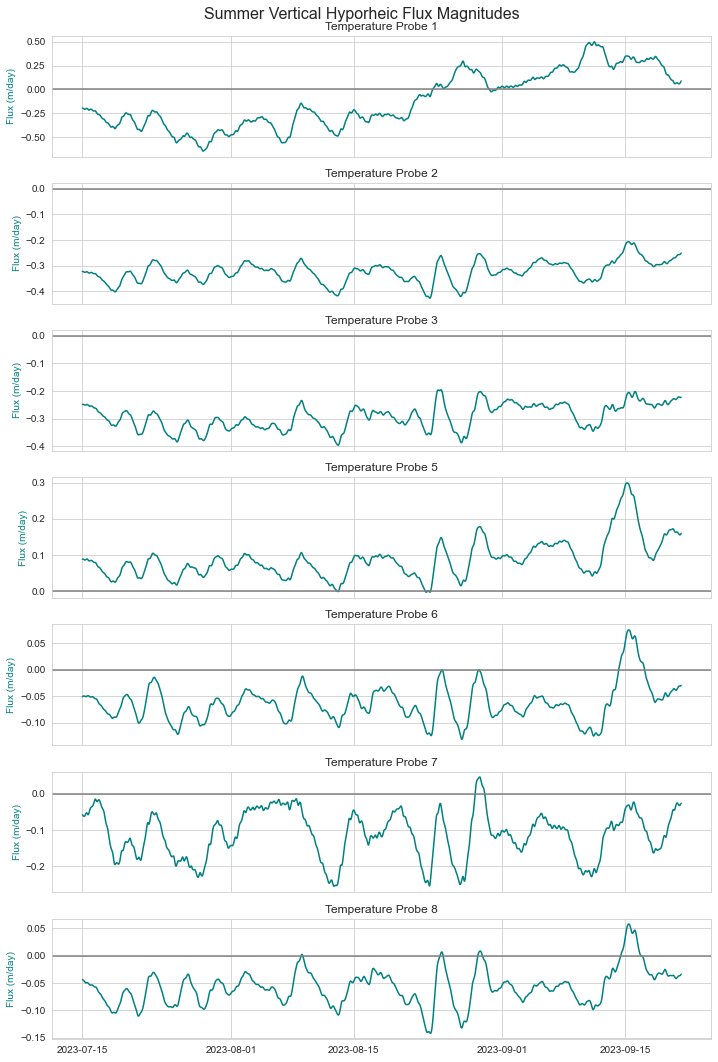

In [5]:
# convert index to datetime if not already
summer_HF.index = pd.to_datetime(summer_HF.index)
# keep all data after 7/15/2023
summer_HF = summer_HF[summer_HF.index >= '2023-07-15']

# Plot time series of water depth and hyporheic flux
sns.set_style('whitegrid')
fig, ax = plt.subplots(7, 1, figsize=(10, 15), sharex=True)
fig.patch.set_facecolor('white')

# function to plot data and highlight ranges
def plot_HF(ax, flux_col, title, flux_color):
    ax.set_title(title)
    ax.plot(summer_HF.index, summer_HF[flux_col], label=f'{flux_col} Flux', color=flux_color, linestyle='-')
    ax.set_ylabel('Flux (m/day)', color=flux_color)
    ax.axhline(0, color='gray', linewidth=1.5)

# Plot each subplot
plot_HF(ax[0], 'T1', 'Temperature Probe 1', 'teal')
plot_HF(ax[1], 'T2', 'Temperature Probe 2', 'teal')
plot_HF(ax[2], 'T3', 'Temperature Probe 3', 'teal')
plot_HF(ax[3], 'T5', 'Temperature Probe 5', 'teal')
plot_HF(ax[4], 'T6', 'Temperature Probe 6', 'teal')
plot_HF(ax[5], 'T7', 'Temperature Probe 7', 'teal')
plot_HF(ax[6], 'T8', 'Temperature Probe 8', 'teal')

fig.suptitle('Summer Vertical Hyporheic Flux Magnitudes', fontsize=16)
fig.tight_layout()
plt.savefig('summer_HF_mday.png', dpi=500)
plt.show()

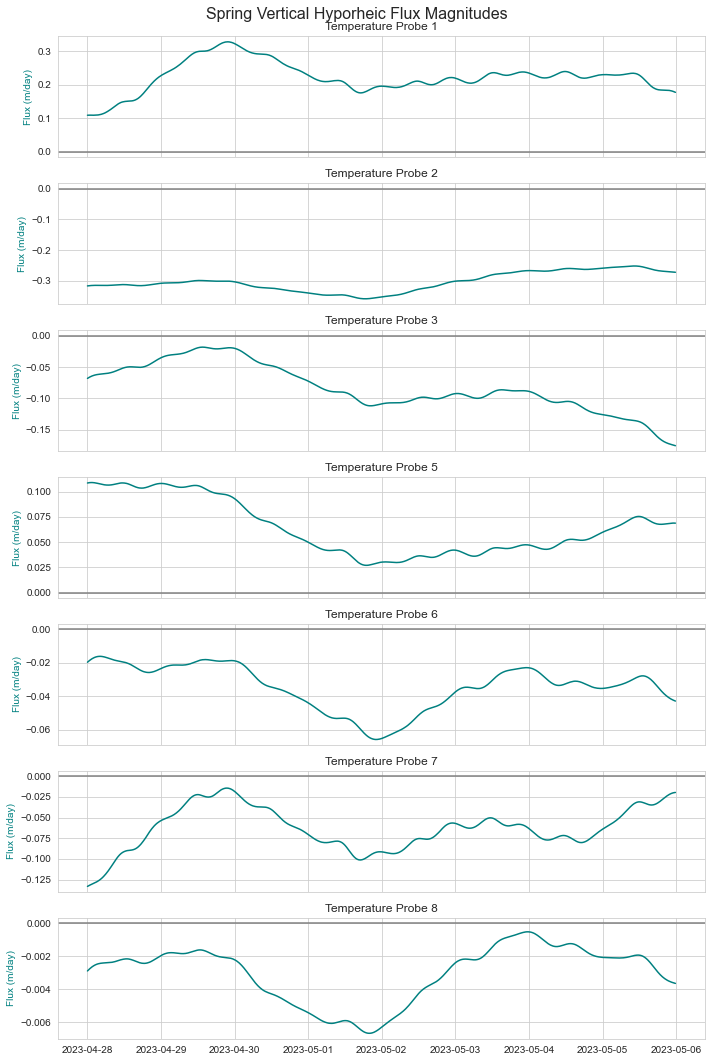

In [8]:
# convert index to datetime if not already
spring_HF.index = pd.to_datetime(spring_HF.index)

# Plot time series of water depth and hyporheic flux
sns.set_style('whitegrid')
fig, ax = plt.subplots(7, 1, figsize=(10, 15), sharex=True)
fig.patch.set_facecolor('white')

# function to plot data and highlight ranges
def plot_HF(ax, flux_col, title, flux_color):
    ax.set_title(title)
    ax.plot(spring_HF.index, spring_HF[flux_col], label=f'{flux_col} Flux', color=flux_color, linestyle='-')
    ax.set_ylabel('Flux (m/day)', color=flux_color)
    ax.axhline(0, color='gray', linewidth=1.5)

# Plot each subplot
plot_HF(ax[0], 'T1', 'Temperature Probe 1', 'teal')
plot_HF(ax[1], 'T2', 'Temperature Probe 2', 'teal')
plot_HF(ax[2], 'T3', 'Temperature Probe 3', 'teal')
plot_HF(ax[3], 'T5', 'Temperature Probe 5', 'teal')
plot_HF(ax[4], 'T6', 'Temperature Probe 6', 'teal')
plot_HF(ax[5], 'T7', 'Temperature Probe 7', 'teal')
plot_HF(ax[6], 'T8', 'Temperature Probe 8', 'teal')

fig.suptitle('Spring Vertical Hyporheic Flux Magnitudes', fontsize=16)
fig.tight_layout()
plt.savefig('spring_HF_mday.png', dpi=500)
plt.show()

Getting ranges and stuff 

In [9]:
# Calculate mean, max, and min for each probe in each season
spring_stats = spring_HF.agg(['mean', 'max', 'min'])
summer_stats = summer_HF.agg(['mean', 'max', 'min'])

# Calculate seasonal mean, max, and min considering all probe data
spring_seasonal_stats = spring_HF.stack().agg(['mean', 'max', 'min'])
summer_seasonal_stats = summer_HF.stack().agg(['mean', 'max', 'min'])

print("Spring Probe Stats:")
print(spring_stats)

print("\nSummer Probe Stats:")
print(summer_stats)

print("\nSpring Seasonal Stats:")
print(spring_seasonal_stats)

print("\nSummer Seasonal Stats:")
print(summer_seasonal_stats)

Spring Probe Stats:
            T1        T2        T3        T5        T6        T7        T8
mean  0.223107 -0.303252 -0.083110  0.063952 -0.034345 -0.063028 -0.003005
max   0.328000 -0.251703 -0.018304  0.109184 -0.016071 -0.014224 -0.000519
min   0.109300 -0.358544 -0.175087  0.027039 -0.065734 -0.133146 -0.006655

Summer Probe Stats:
            T1        T2        T3        T5        T6        T7        T8  \
mean -0.186449 -0.315291 -0.283694  0.080967 -0.070387 -0.105242 -0.056250   
max   0.498730  0.000000 -0.195372  0.299097  0.075509  0.058303  0.058027   
min  -0.647692 -0.426933 -0.395841 -0.002452 -0.133570 -0.255759 -0.142156   

      Unnamed: 8  Unnamed: 9  
mean         NaN         NaN  
max          NaN         NaN  
min          NaN         NaN  

Spring Seasonal Stats:
mean   -0.028526
max     0.328000
min    -0.358544
dtype: float64

Summer Seasonal Stats:
mean   -0.133764
max     0.498730
min    -0.647692
dtype: float64
